# Volatility
We will calculate the volatility on the SP500 for the purpose of determining if an anomalous event has occurred.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override() 

#import stockstats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
#load daily data from Yahoo Finance
# download dataframe
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2019-01-01")


[*********************100%***********************]  1 of 1 downloaded


In [3]:
#data

In [4]:
#We will now calculate the log returns
data['Return'] = np.log(data['Close'] / data['Close'].shift(1))

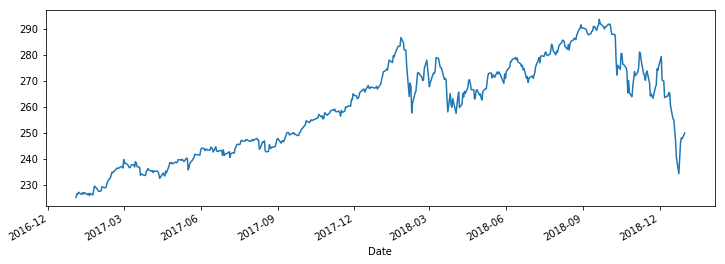

In [5]:
#Plot our data for a visual check
fig1, ax1 = plt.subplots(figsize=(12,4))
data.Close.plot()

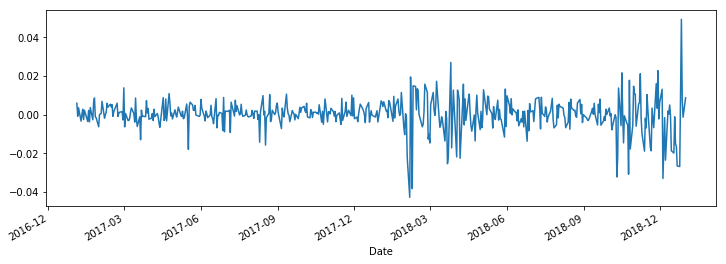

In [6]:
#Plot our log returns
fig1, ax1 = plt.subplots(figsize=(12,4))
data.Return.plot()

In [7]:
#Now lets calculate our simple rolling standard deviation on the returns
data["Stdev"] = data.Return.rolling(21).std(ddof=0)

#.std()*(252**0.5)

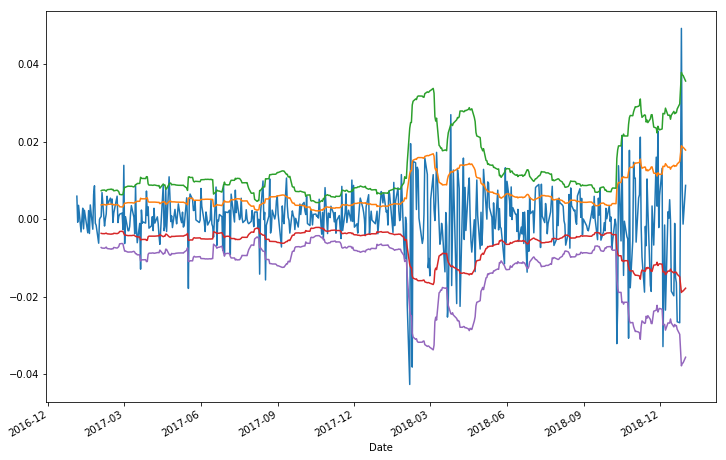

In [133]:
#Plot the standard deviation of the returns.
fig1, ax1 = plt.subplots(figsize=(12,8))
data.Return.plot()
data["Stdev"].plot()

#We can use first or second standard deviation as an indicator of anomalous activity.
(data["Stdev"] * 2).plot()
(data["Stdev"] *-1).plot()
(data["Stdev"] *-2).plot()

In [103]:
#Lets show what days the return was above or below the second standard deviation
neg_anomalies = data[~np.isnan(data["Stdev"]) & (data["Return"] < -2*data["Stdev"].shift(1))]
pos_anomalies = data[~np.isnan(data["Stdev"]) & (data["Return"] > 2*data["Stdev"].shift(1))]

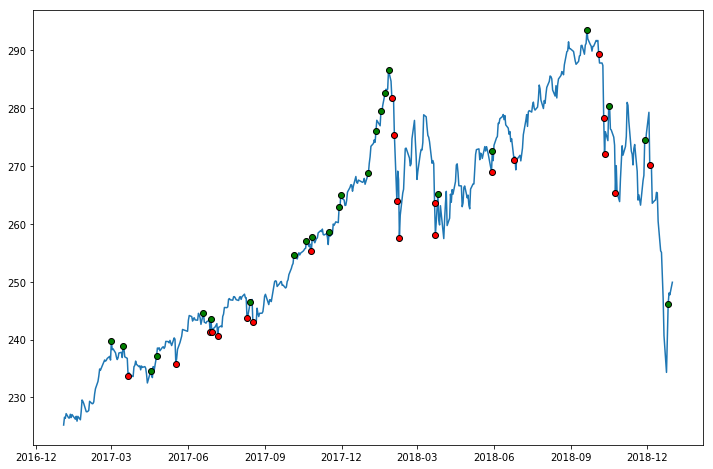

In [114]:
#Visualize the dates on the price chart where this occurred for sanity check
fig1, ax1 = plt.subplots(figsize=(12,8))
every_neg = list(neg_anomalies["ix"].values)
every_pos = list(pos_anomalies["ix"].values)
plt.plot(data["Close"], marker='o', markevery=every_neg, markersize=6, markerfacecolor='red',markeredgecolor='black')
plt.plot(data["Close"], linestyle='none', marker='o', markevery=every_pos, markersize=6, markerfacecolor='green',markeredgecolor='black')

Can we create a filter witch identifies only significant negative anomalies?
We can see there are some false positives in mid 2017, but can we separate those from the crashes in feb 2018 and oct-dec 2018?
Perhaps look at two consecutive days with the first being an anomaly and the second simply having a weak return.

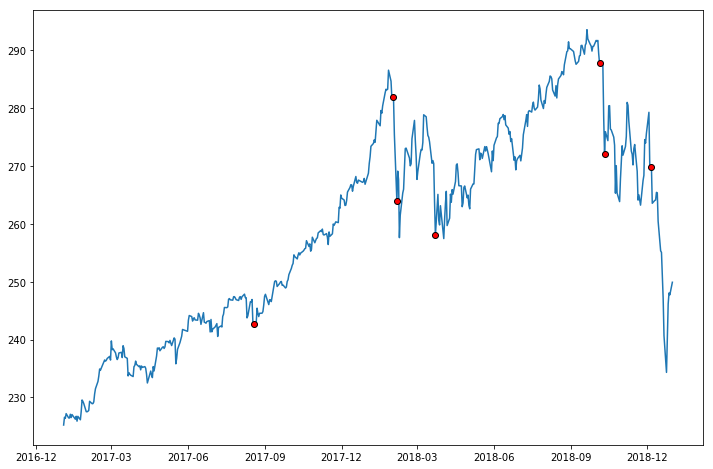

In [130]:
#Using a two day look back since we cannot use information from the future.
neg_anomalies = data[~np.isnan(data["Stdev"].shift(2)) 
                     & (data["Return"].shift(1) < -2*data["Stdev"].shift(2) )
                     & (data["Return"] < 0.0005)]

fig1, ax1 = plt.subplots(figsize=(12,8))
every_neg = list(neg_anomalies["ix"].values)
plt.plot(data["Close"], marker='o', markevery=every_neg, markersize=6, markerfacecolor='red',markeredgecolor='black')